![](https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset.png)

In this notebook, we would train ANNs and CNNs on the MNIST Digit Classification Dataset. Let's look first at what ANNs are.

An **Artificial Neural Network (ANN)** in the field of Artificial intelligence where it attempts to mimic the network of neurons makes up a human brain so that computers will have an option to understand things and make decisions in a human-like manner. The artificial neural network is designed by programming computers to behave simply like interconnected brain cells.

**The architecture of an artificial neural network:**

To understand the concept of the architecture of an artificial neural network, we have to understand what a neural network consists of. In order to define a neural network that consists of a large number of artificial neurons, which are termed units arranged in a sequence of layers. Lets us look at various types of layers available in an artificial neural network.

Artificial Neural Network primarily consists of three layers:

![](https://static.javatpoint.com/tutorial/artificial-neural-network/images/artificial-neural-network4.png)

1. Input Layer: As the name suggests, it accepts inputs in several different formats provided by the programmer.

2. Hidden Layer: The hidden layer presents in-between input and output layers. It performs all the calculations to find hidden features and patterns.

3. Output Layer: The input goes through a series of transformations using the hidden layer, which finally results in output that is conveyed using this layer.

The artificial neural network takes input and computes the weighted sum of the inputs and includes a bias. This computation is represented in the form of a transfer function.

![](https://static.javatpoint.com/tutorial/artificial-neural-network/images/artificial-neural-network5.png)

Artificial Neural Network determines weighted total is passed as an input to an activation function to produce the output. Activation functions choose whether a node should fire or not. Only those who are fired make it to the output layer. There are distinctive activation functions available that can be applied upon the sort of task we are performing. For regression, we can use `softmax` however for classification, we can use `sigmoid`.

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)
import tensorflow
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

`y_train` and `y_test` basically contain the classes that are to be predicted with the help of the images provided

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Let's take a look at an image from the training dataset

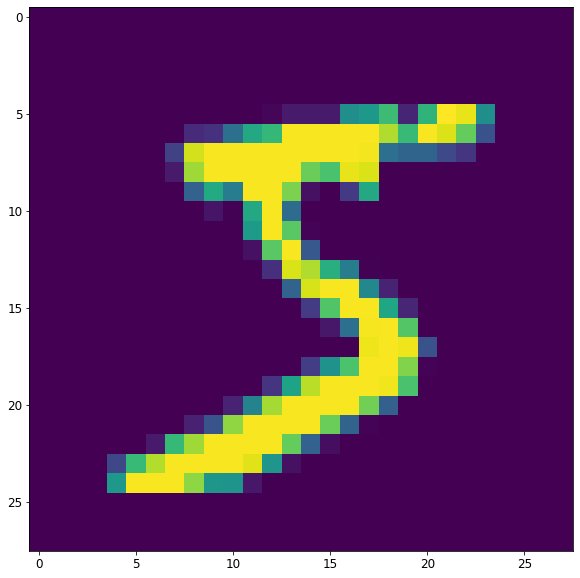

In [7]:
plt.imshow(X_train[0]);

In [8]:
px.histogram(x=y_train, template='simple_white', title='Count Plot of Image Labels')

We are dividing the variables by 255 in order to scale them down within a certain range which will help the model converge faster and hence reduce the training time.

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_test.shape

(10000, 28, 28)

## Building an ANN

The model that we are building is a very simple one that contains 1 input layers that takes the data where the intial weights and biases are assumed at the beginning of the training and using the `relu` function the activation is done which then becomes the input for the second layer aka Hidden Layer where we have given 32 nodes. 

Next is a `dropout` layer which will randomly turn of the nodes in the hidden layer and this is being done to reduce the overfitting our model is likely to do. We then enter the `output` layer which basically has 10 nodes for 10 outputs of our mutliclass classification problem 

In [11]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) #Flattening the data
model.add(Dense(128,activation='relu')) #input layer
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))  #Hidden Layer
model.add(Dense(10,activation='softmax'))  #Output Layer

2022-08-07 15:36:10.387954: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-07 15:36:10.393117: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-07 15:36:10.393810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-07 15:36:10.395735: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


Keras is setting the initial weights and biases which we can see below. These will later on be updated using `Backpropogation` and `Gradient Descent` and will keep on updating until convergence happens which means the loss is minimum but at the same time its also critical to understand if the data will overfit or not. Below is how the weights and biases are updated and this is what in Deep Learning is termed as `Backpropogation` 

![](https://miro.medium.com/max/1838/1*diQ7YbcLAZvqTMSOU8TYNw.png)

In [13]:
model.get_weights()[0]  #weights

array([[-0.02718629, -0.0647923 , -0.0372516 , ..., -0.06734698,
         0.02837344,  0.04124416],
       [ 0.0710878 , -0.03026835,  0.00799256, ...,  0.00871198,
        -0.07072295, -0.03283431],
       [-0.02346722, -0.07424184,  0.05028134, ...,  0.04734234,
        -0.02863604, -0.01078977],
       ...,
       [-0.02230555,  0.02042565,  0.05739499, ..., -0.03232064,
        -0.07231128,  0.01791251],
       [ 0.07806935,  0.02666786,  0.05071706, ..., -0.02777645,
         0.07842319,  0.07944251],
       [-0.06594387,  0.03122091,  0.0746313 , ...,  0.07687151,
        -0.01247216, -0.02452127]], dtype=float32)

In [14]:
model.get_weights()[1] #biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

We have taken `sparse_categorical_crossentropy` because it's faster as opposed to `categorical_crossentropy` since we don't need to OneHotEncode the data manually.

We can use `sparse_categorical_crossentropy` when your classes are mutually exclusive (e.g. when each sample belongs exactly to one class) and `categorical_crossentropy` when one sample can have multiple classes (e.g MNIST dataset) or labels are soft probabilities (like [0.5, 0.3, 0.2]).

We are also using the `Early Stopping` technique to ensure the data doesn't overfit and `Keras` stops the training when the model start to overfit the data. We use this technique by passing the `callbacks` argument

In [15]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2, verbose=0, callbacks=callback)

2022-08-07 15:36:13.929111: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 00018: early stopping


We can check the training  stats from the code below. Epochs for the training can be checked using `history.epoch`. Loss can be checked by `history.history['loss']` and `history.history['val_loss']`.

In [17]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Plotting the Loss Plot

In [18]:
fig = px.line(y=history.history['loss'], template='simple_white',title = 'ANN Training Loss Plot')
fig1 = px.line(y=history.history['val_loss'], template='simple_white',title = 'ANN Validation Loss Plot')
fig.show()
fig1.show()

In [19]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
print('The accuracy of our model is %0.3f' % (accuracy_score(y_test,y_pred)))

The accuracy of our model is 0.945


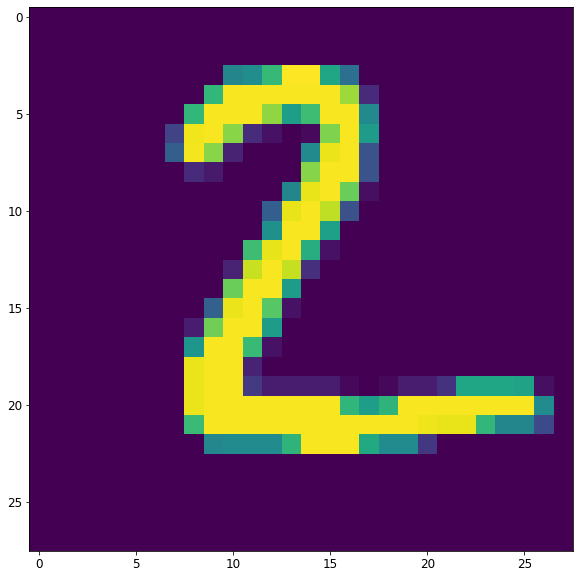

In [20]:
plt.imshow(X_test[1]);

In [21]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

array([2])

## Convolution Neural Network (CNN)

Now that we are done training and improving the ANN. We will now use the CNN (Convolution Neural Network) for training and prediction purposes. 

### What are convolutions?
A convolution is a filter that passes over an image, processes it, and extracts the important features.

Let's say you have an image of a person wearing a sneaker. How would you detect that a sneaker is present in the image? In order for your program to "see" the image as a sneaker, you'll have to extract the important features, and blur the inessential features. This is called feature mapping.

The feature mapping process is theoretically simple. You'll scan every pixel in the image and then look at its neighboring pixels. You multiply the values of those pixels by the equivalent weights in a filter.

For example:

![](https://developers.google.com/static/codelabs/tensorflow-3-convolutions/img/f7b0ab29e09a51f.png)

In this case, a 3x3 convolution matrix, or image kernel, is specified.

The current pixel value is 192. You can calculate the value of the new pixel by looking at the neighbor values, multiplying them by the values specified in the filter, and making the new pixel value the final amount.

### Understanding Pooling
Similar to convolutions, pooling greatly helps with detecting features. Pooling layers reduce the overall amount of information in an image while maintaining the features that are detected as present.

![](https://developers.google.com/static/codelabs/tensorflow-3-convolutions/img/6029904d82700d8e.png)

There are a number of different types of pooling, but you'll use one called Maximum (Max) Pooling.

Iterate over the image and, at each point, consider the pixel and its immediate neighbors to the right, beneath, and right-beneath. Take the largest of those (hence max pooling) and load it into the new image. Thus, the new image will be one-fourth the size of the old.

Let's now train the CNN on the same data. We have reshaped the data and then flattened it out before giving it to the output layer which basically will classify the digit.

In [22]:
X_train.shape

(60000, 28, 28)

In [23]:
X_test.shape

(10000, 28, 28)

In [24]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [25]:
X_train[0].shape

(28, 28, 1)

In [26]:
model = Sequential()

#1st Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'valid', input_shape=(28,28,1))),
model.add(MaxPool2D(pool_size=(2, 2), strides=2)),
model.add(Dropout(0.25))

#2nd Layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#Output Layer
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

#Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [27]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [28]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2,verbose=0, callbacks=callback)

2022-08-07 15:37:06.954989: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


Epoch 00007: early stopping


In [29]:
fig = px.line(y=history.history['loss'], template='simple_white',title = 'CNN Training Loss Plot')
fig1 = px.line(y=history.history['val_loss'], template='simple_white',title = 'CNN Validation Loss Plot')
fig.show()
fig1.show()

In [30]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

In [31]:
print('The accuracy of our model is %0.3f' % (accuracy_score(y_test,y_pred)))

The accuracy of our model is 0.982


**Further Resources**

1. https://colab.research.google.com/drive/1dJZZdhngq4eN83sQCupyh2QbyzrsBB-e?usp=sharing
2. https://developers.google.com/codelabs/tensorflow-3-convolutions#5
3. https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6